# Contents
1. EDA
2. Data Engineer
3. Algorithms
4. Metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
sns.set()

## 1. EDA
### Load Data

In [3]:
df_train_trans = pd.read_csv("../dataset/train_transaction.csv")
df_test_trans = pd.read_csv("../dataset/test_transaction.csv")
print("df_train_trans.shape:", df_train_trans.shape)
print("df_test_trans.shape:", df_test_trans.shape)

df_train_id = pd.read_csv("../dataset/train_identity.csv")
df_test_id = pd.read_csv("../dataset/test_identity.csv")
print("df_train_id.shape:", df_train_id.shape)
print("df_test_id.shape:", df_test_id.shape)

df_train_trans.shape: (590540, 394)
df_test_trans.shape: (506691, 393)
df_train_id.shape: (144233, 41)
df_test_id.shape: (141907, 41)


In [4]:
df_train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


### Check out data types, missing values

In [5]:
print(df_train_trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None


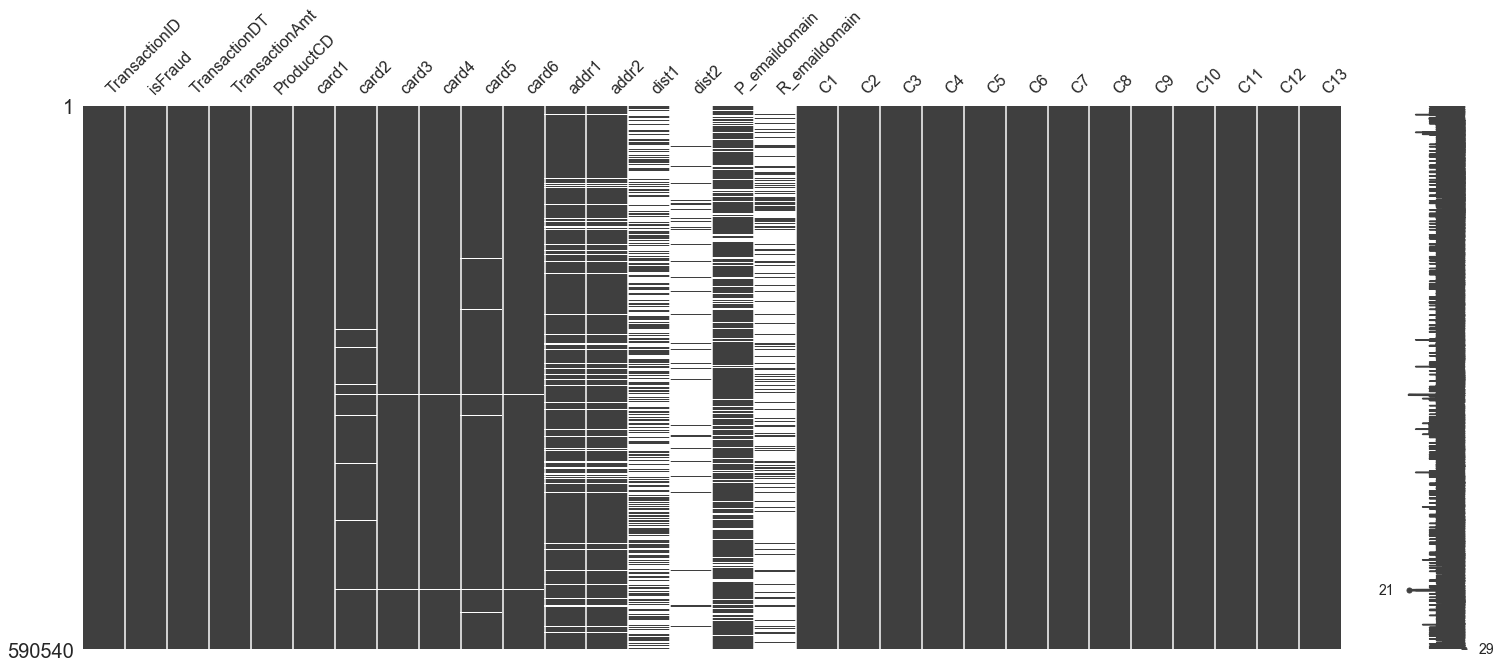

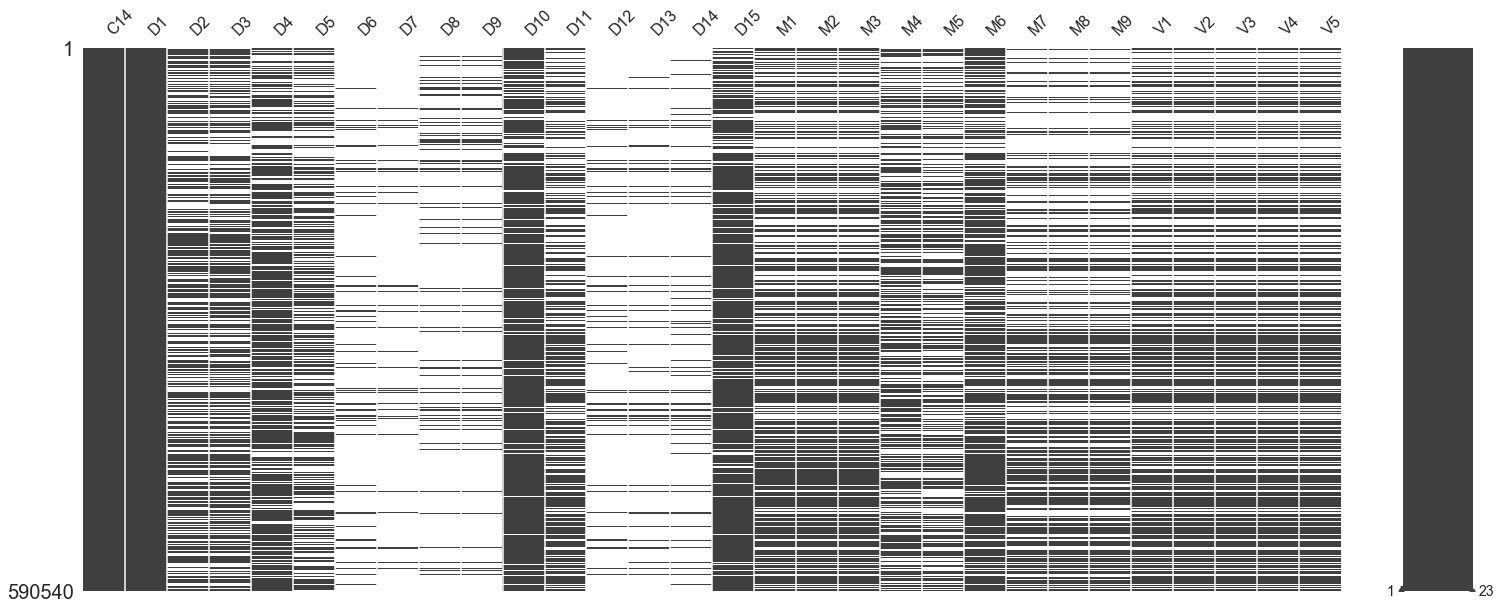

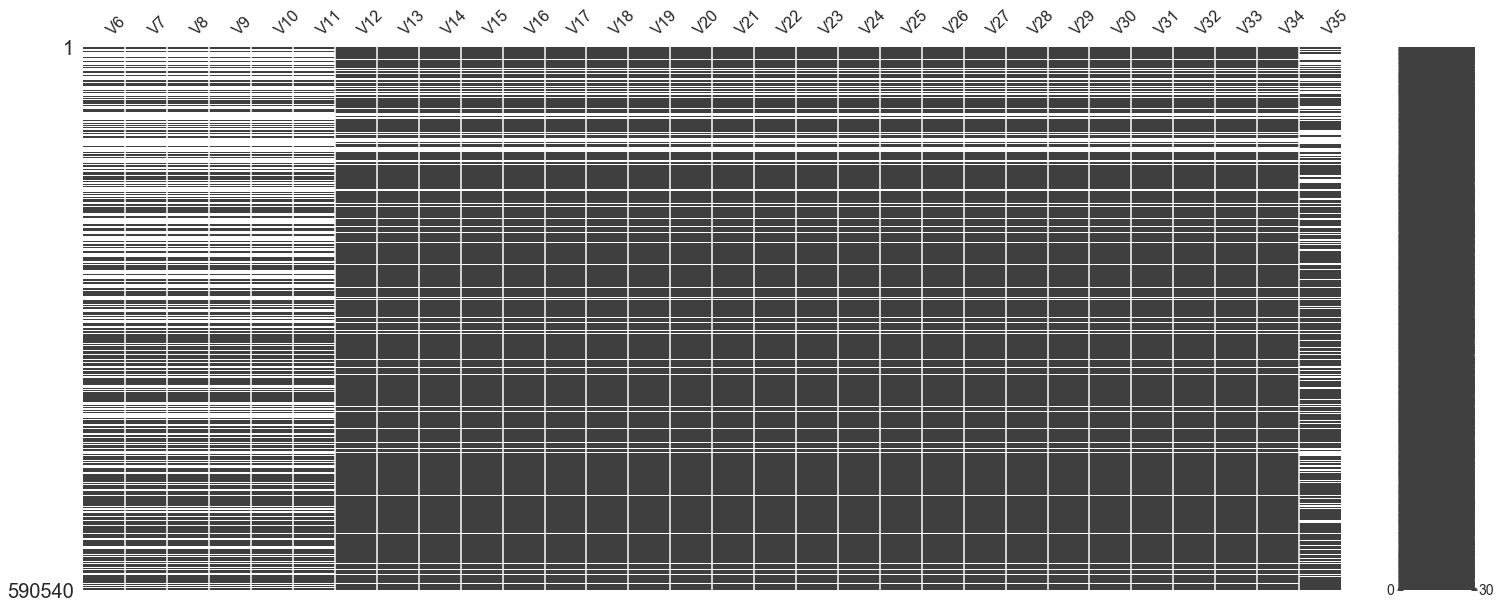

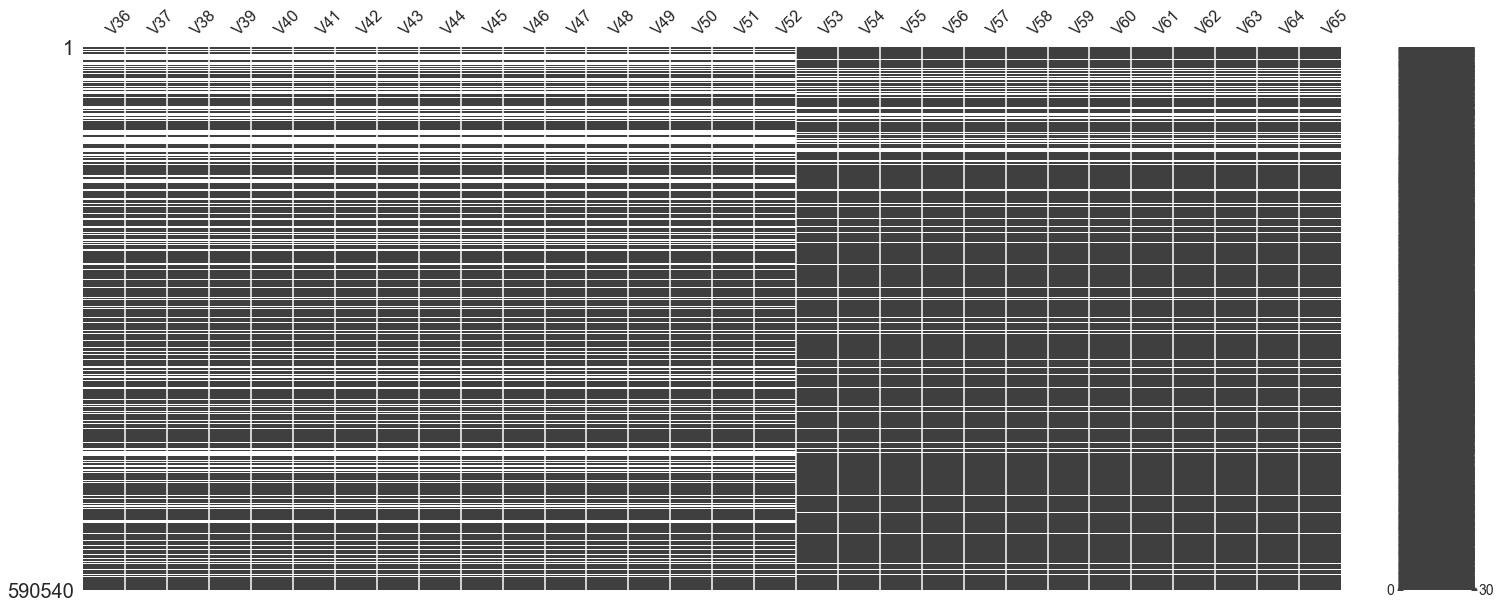

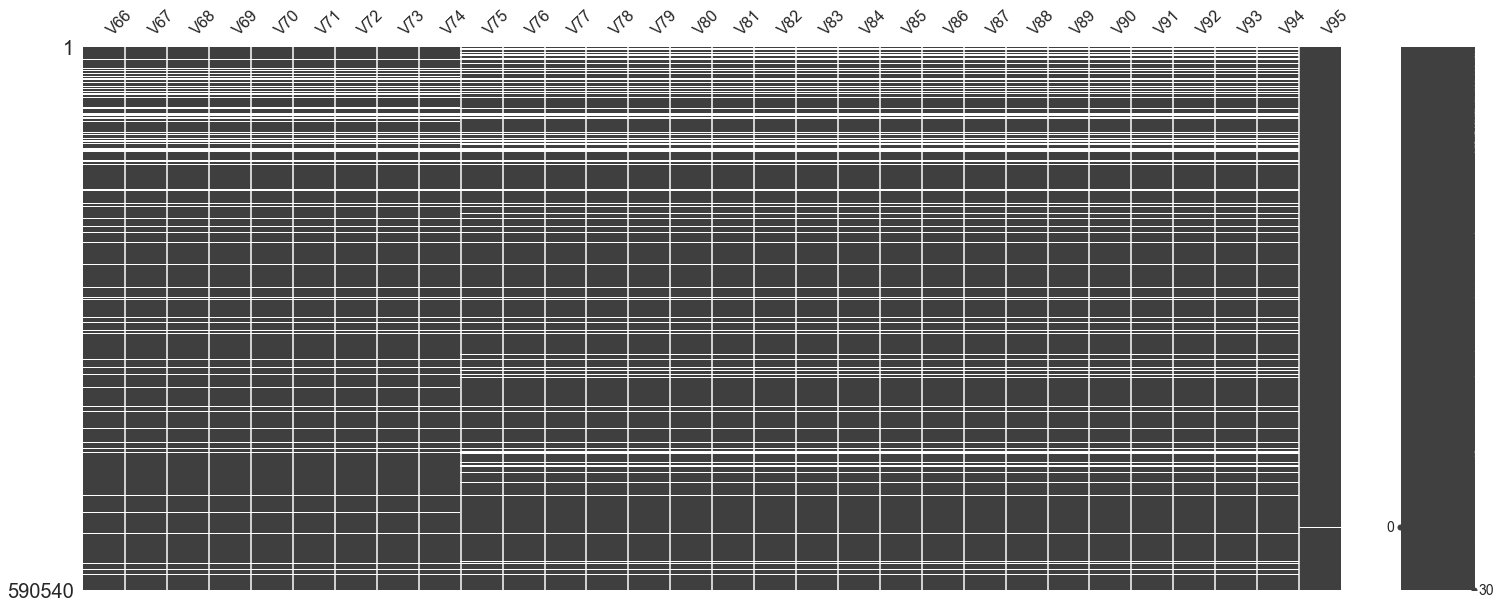

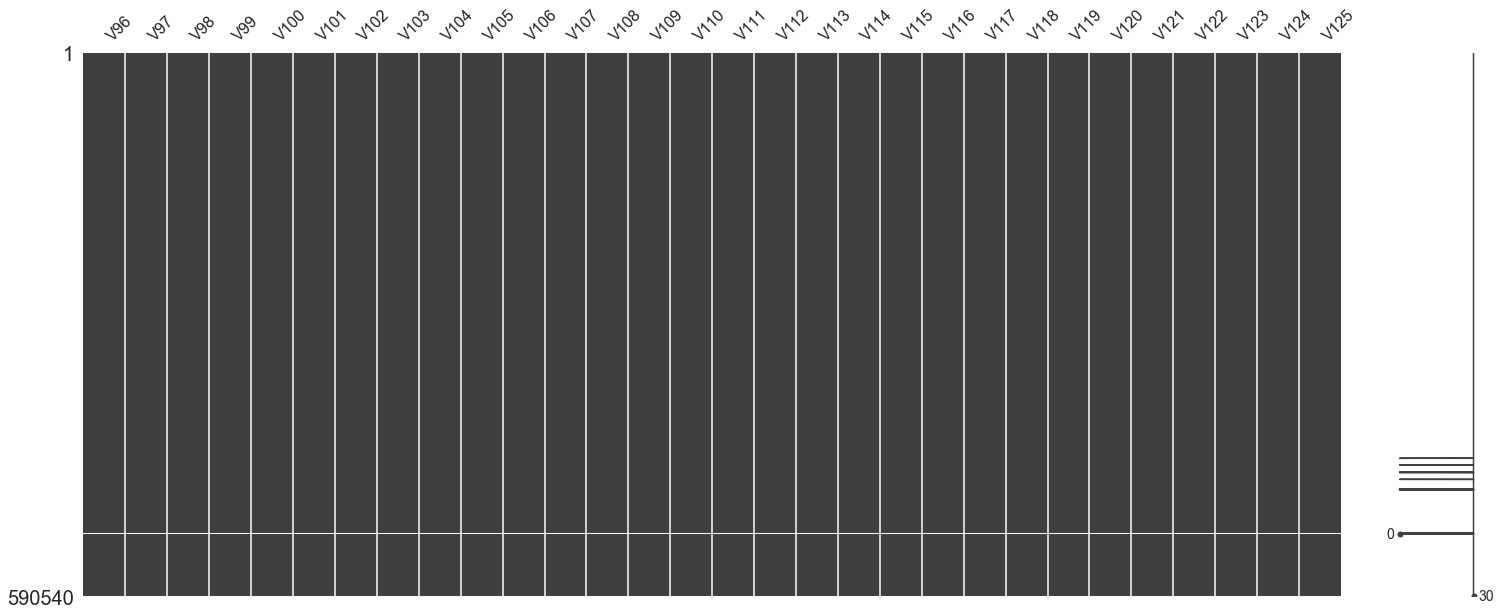

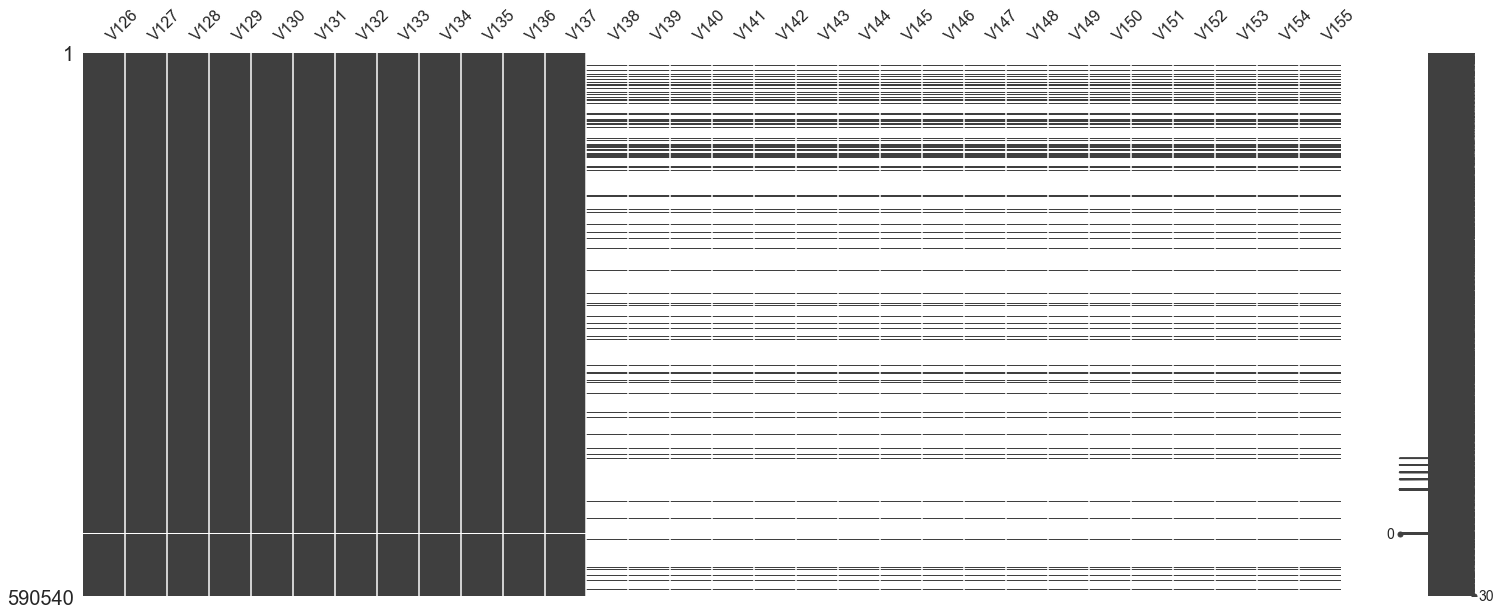

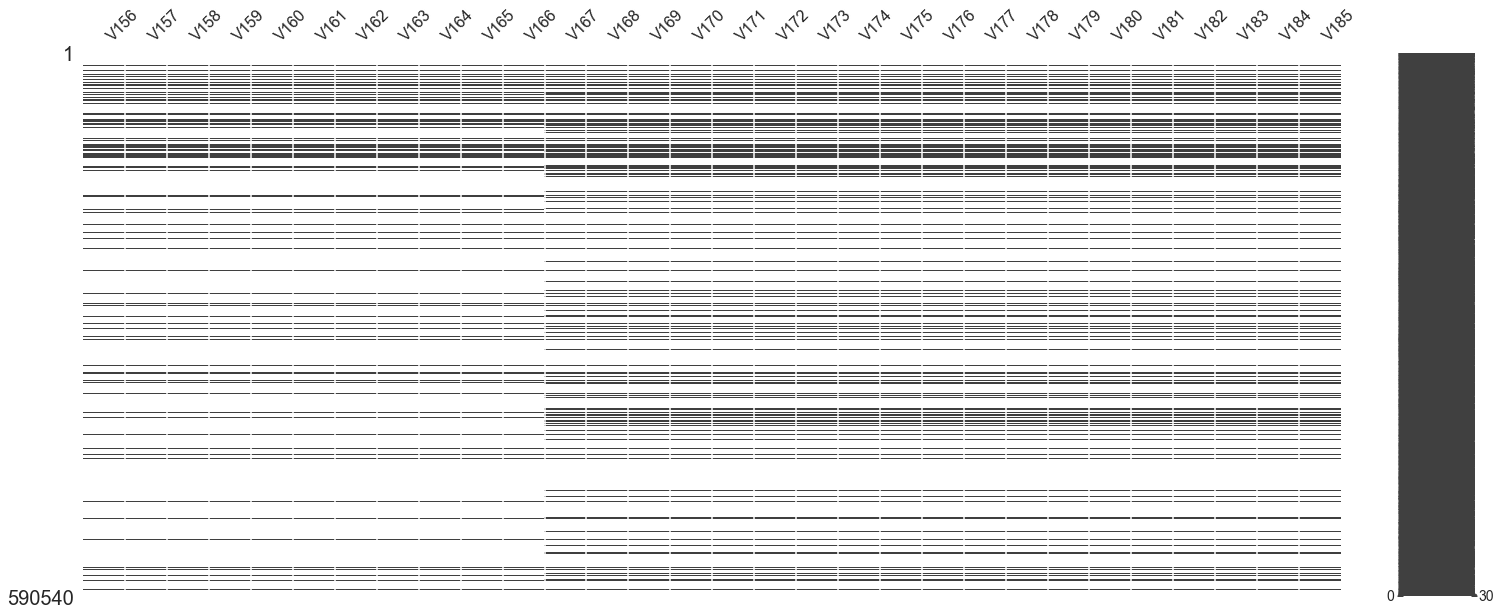

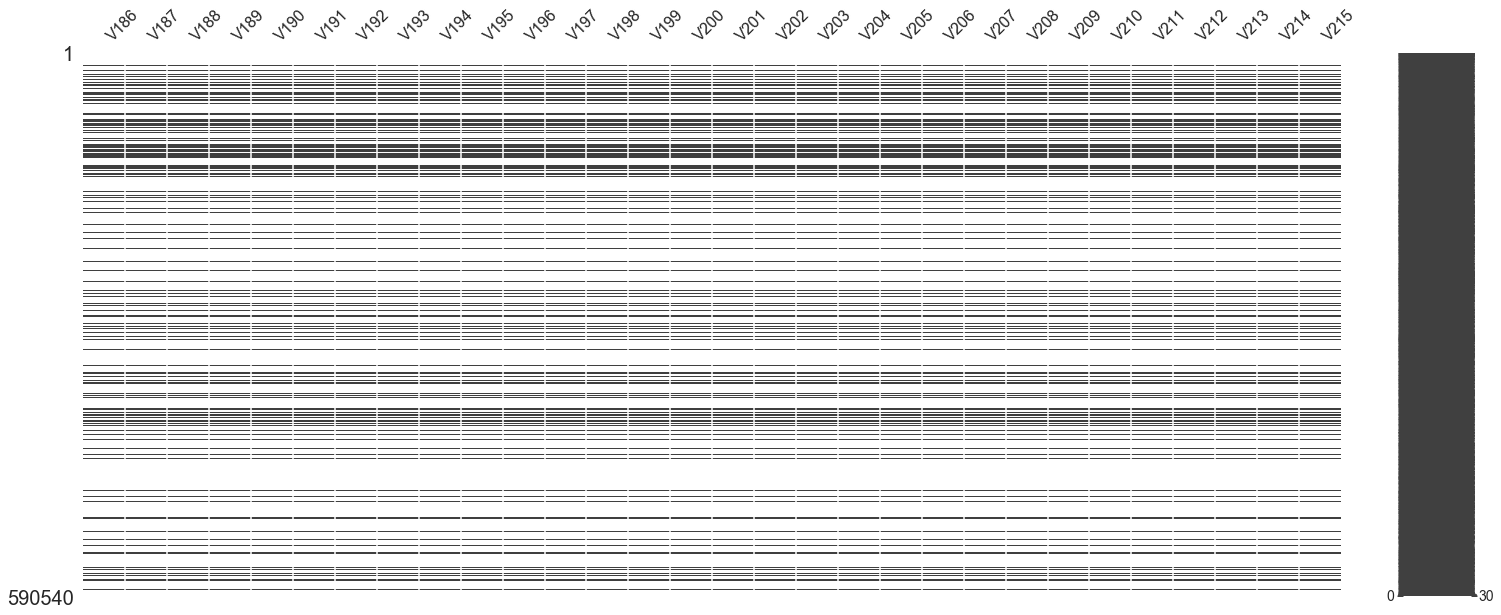

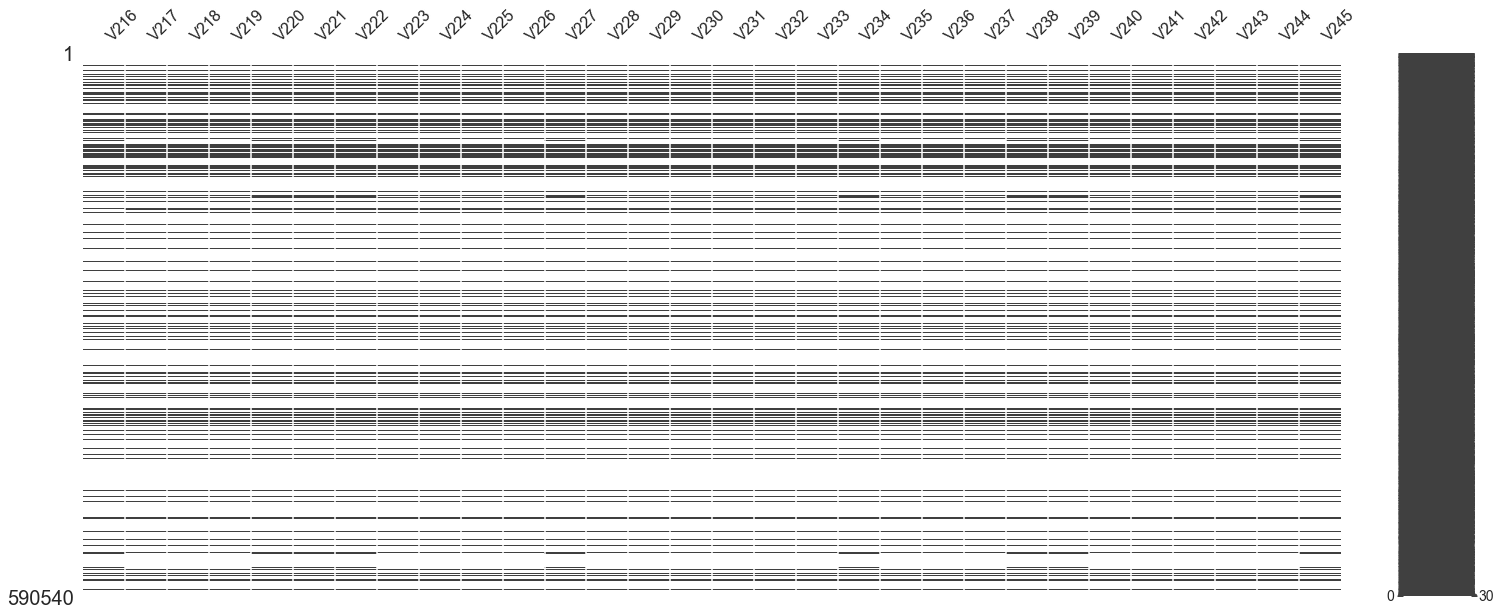

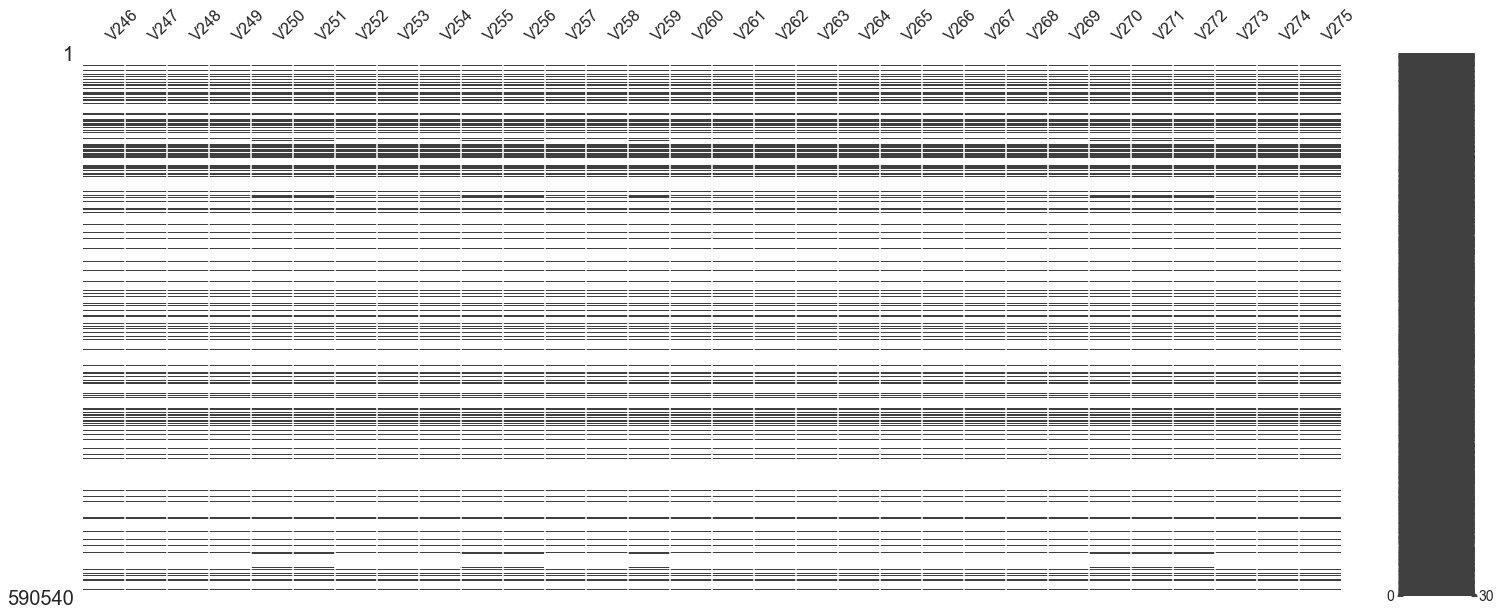

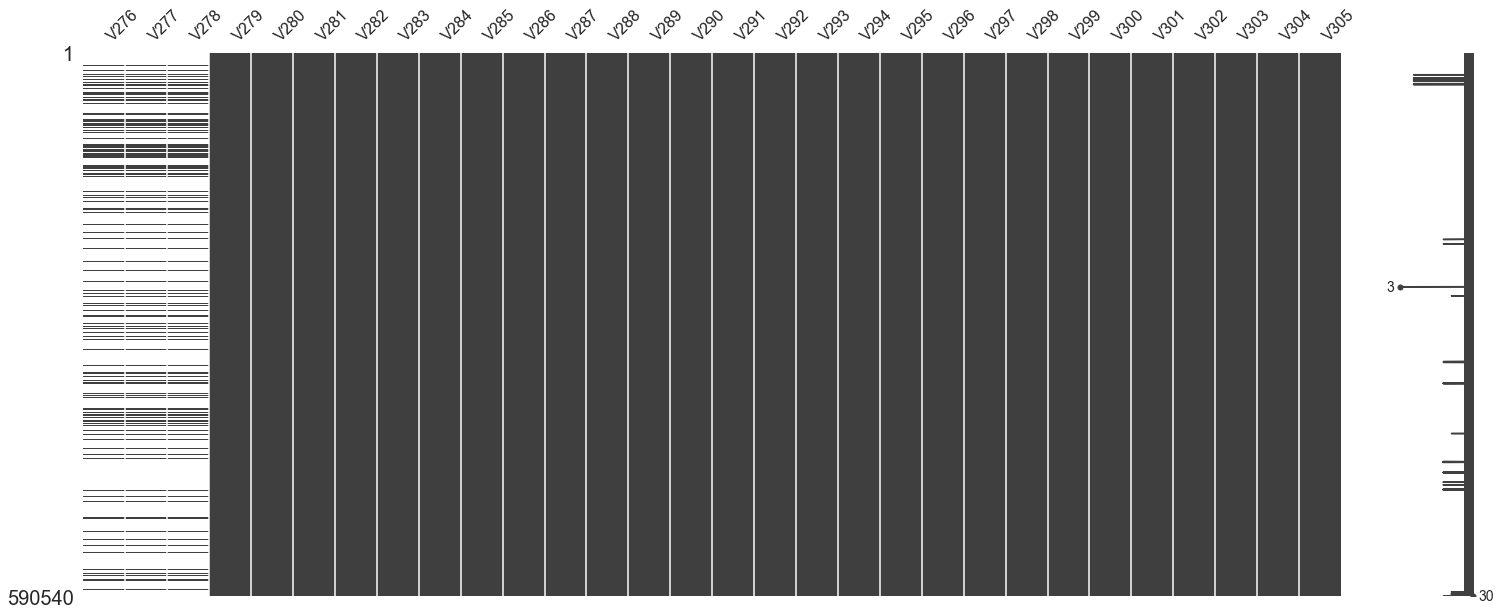

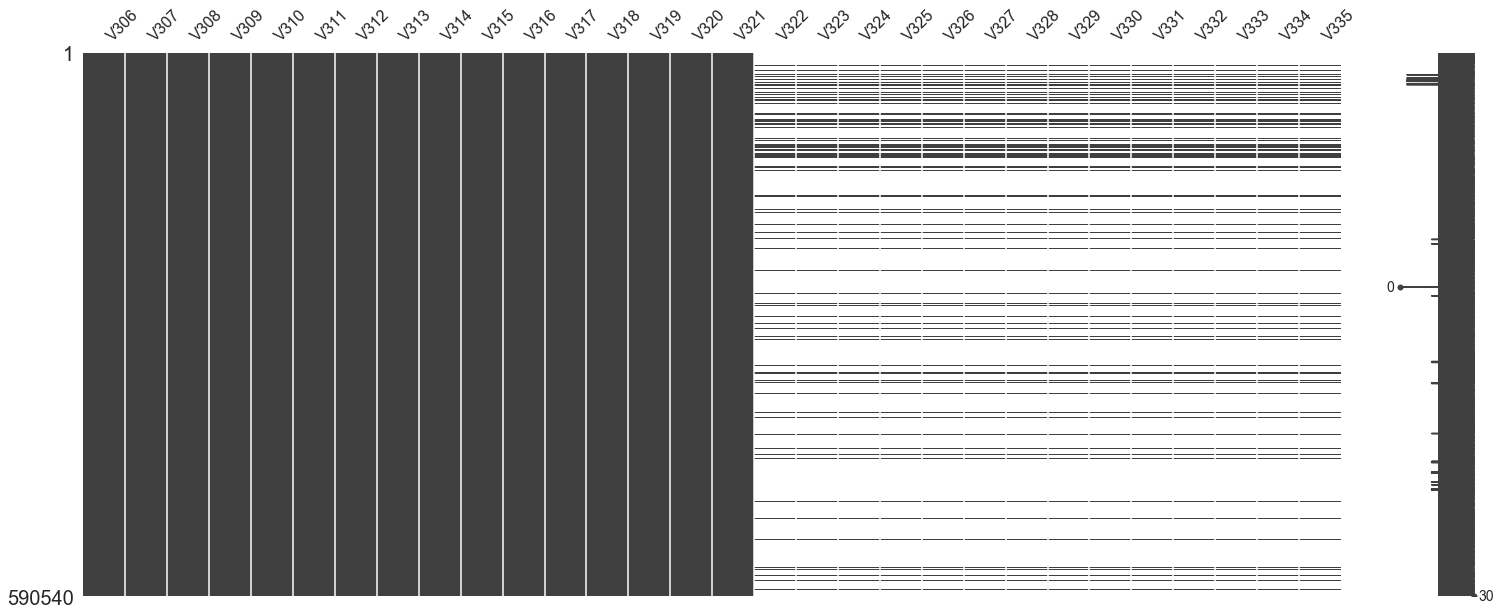

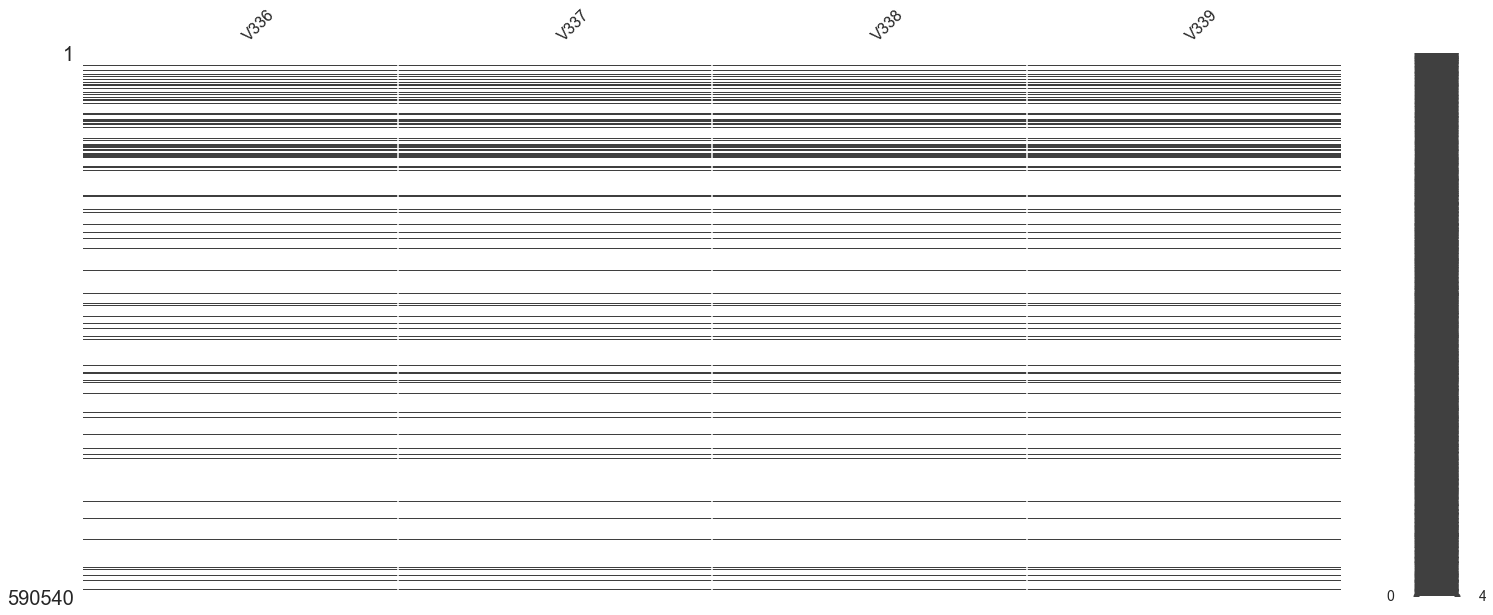

In [8]:
for i in range(14):
    msno.matrix(df_train_trans.iloc[:,i*30:(i+1)*30])

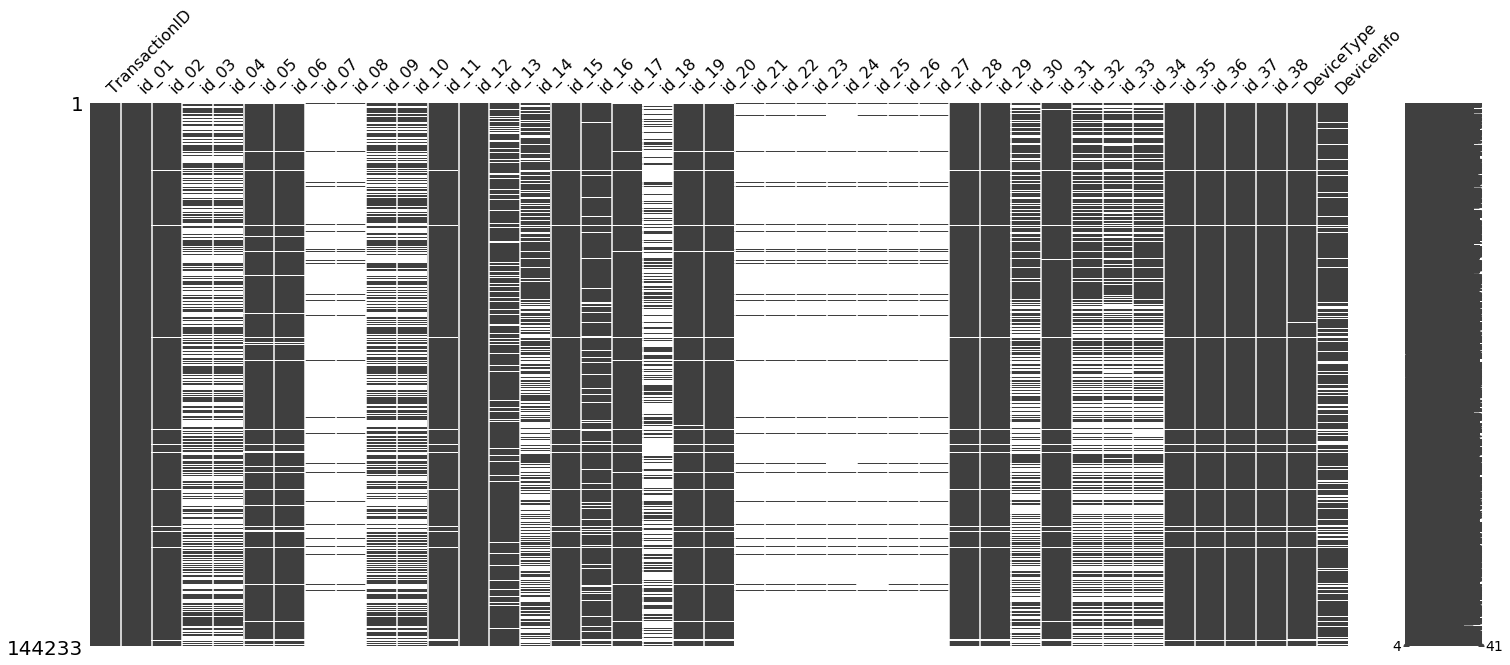

In [6]:
msno.matrix(df_train_id)

total number: 590540
is fraud: 20663,  0.035
is not fraud: 569877,  0.965


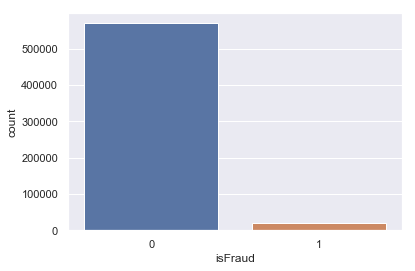

In [47]:
sns.countplot(x="isFraud", data=df_train_trans)
print("total number:", df_train_trans.shape[0])
print("is fraud: {0},  {1:.3f}".format(df_train_trans[df_train_trans.isFraud == 1].shape[0], df_train_trans[df_train_trans.isFraud == 1].shape[0] / df_train_trans.shape[0]))
print("is not fraud: {0},  {1:.3f}".format(df_train_trans[df_train_trans.isFraud == 0].shape[0], df_train_trans[df_train_trans.isFraud == 0].shape[0] / df_train_trans.shape[0]))